In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from os import listdir

In [2]:
cd O:\TUD\__Arp-cortex\_____final-for-thesis\code\data

O:\TUD\__Arp-cortex\_____final-for-thesis\code\data


In [3]:
sns.set_context('talk')

In [4]:
df_data=pd.read_csv('spike-intensity-profiles.csv', index_col=0)
df_data.head(3)

,distance (um),grey value,location,z-height,channel,dist from membrane (um)
0,0.0000,0.488,across-spike4-top,10,actin,-6.3144
1,0.2526,0.125,across-spike4-top,10,actin,-6.0618
2,0.5051,0.327,across-spike4-top,10,actin,-5.8093


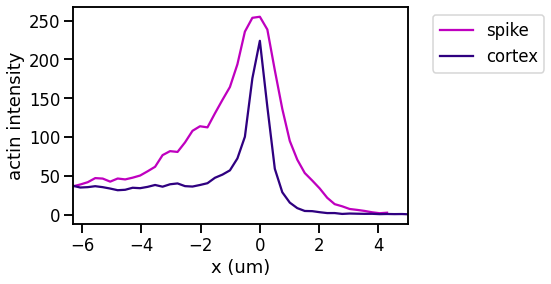

In [5]:
df1=df_data.loc[df_data['location']=='along-spike4']
df1=df1.loc[df1['channel']=='actin']
ax = sns.lineplot(data=df1.loc[df1['z-height']==10], 
             x='dist from membrane (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
             color='m')

df1=df_data.loc[df_data['location']=='cortex2-spike4']
df1=df1.loc[df1['channel']=='actin']
sns.lineplot(data=df1.loc[df1['z-height']==10], 
             x='dist from membrane (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
             color='#2f0080')

ax.set_xlim(-6.3, 5)
ax.set_ylabel('actin intensity')
ax.set_xlabel('x (um)')
plt.legend(['spike', 'cortex'], bbox_to_anchor=(1.05, 1), loc=2 , )

fig=ax.get_figure()

plt.savefig('through-spike.png', dpi=300, bbox_inches='tight')

Integrate actin signal in peak

In [6]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

df1=df_data.loc[df_data['location']=='along-spike4']
df1=df1.loc[df1['channel']=='actin']
df1=df1.loc[(df1['dist from membrane (um)']>-6.2)&(df1['dist from membrane (um)']<4)]
df1=df1.loc[df1['z-height']==10]

df2=df_data.loc[df_data['location']=='cortex2-spike4']
df2=df2.loc[df2['channel']=='actin']
df2=df2.loc[(df2['dist from membrane (um)']>-6.2)&(df2['dist from membrane (um)']<4)]
df2=df2.loc[df2['z-height']==10]
#sns.lineplot(data=df1.loc[df1['z-height']==10], 
#             x='dist from membrane (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
#             color='#2f0080')


# The y values.  A numpy array is used here,
# but a python list could also be used.
y1=df1['grey value'].values
y2=df2['grey value'].values
#y = np.array([5, 20, 4, 18, 19, 18, 7, 4])


# Compute the area using the composite trapezoidal rule.
area1 = trapz(y1, dx=df1['dist from membrane (um)'].diff().mean())
area2 = trapz(y2, dx=df2['dist from membrane (um)'].diff().mean())
print("area spike =", area1)
print("area cortex =", area2)

# Compute the area using the composite Simpson's rule.
#area = simps(y, dx=df2['dist from membrane (um)'].diff().mean())
#print("area =", area)

area spike = 878.3712812717952
area cortex = 412.8946704615383


In [7]:
area1/area2

2.127349525461159

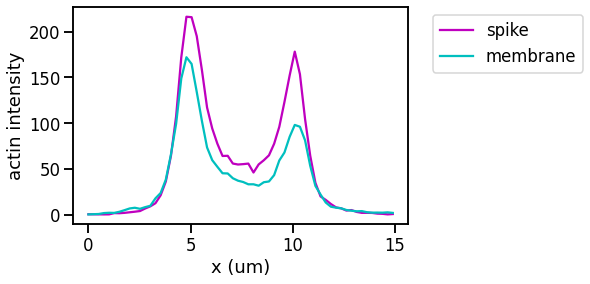

In [8]:
df1=df_data.loc[df_data['location']=='across-spike4']
df1=df1.loc[df1['channel']=='actin']
ax=sns.lineplot(data=df1.loc[df1['z-height']==10], 
             x='distance (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
             color='m')

df1=df_data.loc[df_data['location']=='across-spike4']
df1=df1.loc[df1['channel']=='membrane']
sns.lineplot(data=df1.loc[df1['z-height']==10], 
             x='distance (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
             color='c')

#ax.set_xlim(-5, 10)
ax.set_ylabel('actin intensity')
ax.set_xlabel('x (um)')
#ax.legend() 
plt.legend(['spike', 'membrane'],bbox_to_anchor=(1.05, 1), loc=2 , )


plt.savefig('across-spike.png', dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='distance (um)', ylabel='grey value'>

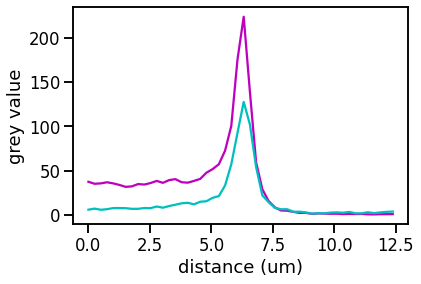

In [9]:
df1=df_data.loc[df_data['location']=='cortex2-spike4']
df1=df1.loc[df1['channel']=='actin']
sns.lineplot(data=df1.loc[df1['z-height']==10], 
             x='distance (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
             color='m')

df1=df_data.loc[df_data['location']=='cortex2-spike4']
df1=df1.loc[df1['channel']=='membrane']
sns.lineplot(data=df1.loc[df1['z-height']==10], 
             x='distance (um)', y='grey value', #hue='z-height', 
             #palette=['#d988db', '#730096', '#2f0080'],)
             color='c')